## POSTTEST 6 Kecerdasan Buatan
Nama : Krisdayanti

NIM : 2009106064

Kelas : KB B1'20

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as skdt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, complete

In [2]:
ds = pd.read_csv('my_dataset\Earthquakes in Indonesia.csv')
ds.head(5)

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
1,2008/11/01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
4,2008/11/01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
ds.tail(5)

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
88584,2022/09/30,02:45:26.316,-0.02,123.59,108,3.5,Minahassa Peninsula - Sulawesi,NaN,NaN,NaN,NaN,NaN,NaN
88585,2022/09/30,00:55:25.665,-5.58,131.14,132,4.1,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
88586,2022/09/30,00:21:53.907,-10.34,124.75,10,3.8,Timor Region,NaN,NaN,NaN,NaN,NaN,NaN
88587,2022/09/30,00:17:02.868,-2.27,140.10,10,3.1,Near North Coast of Irian Jaya,NaN,NaN,NaN,NaN,NaN,NaN
88588,2022/09/30,00:09:19.314,-0.20,122.95,32,3.0,Minahassa Peninsula - Sulawesi,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88589 entries, 0 to 88588
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tgl      88589 non-null  object 
 1   ot       88589 non-null  object 
 2   lat      88589 non-null  float64
 3   lon      88589 non-null  float64
 4   depth    88589 non-null  int64  
 5   mag      88589 non-null  float64
 6   remark   88589 non-null  object 
 7   strike1  2581 non-null   float64
 8   dip1     2581 non-null   float64
 9   rake1    2581 non-null   float64
 10  strike2  2581 non-null   float64
 11  dip2     2581 non-null   float64
 12  rake2    2581 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 8.8+ MB


### K-Means Clustering

In [5]:
model = KMeans(n_clusters=8)

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88589 entries, 0 to 88588
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tgl      88589 non-null  object 
 1   ot       88589 non-null  object 
 2   lat      88589 non-null  float64
 3   lon      88589 non-null  float64
 4   depth    88589 non-null  int64  
 5   mag      88589 non-null  float64
 6   remark   88589 non-null  object 
 7   strike1  2581 non-null   float64
 8   dip1     2581 non-null   float64
 9   rake1    2581 non-null   float64
 10  strike2  2581 non-null   float64
 11  dip2     2581 non-null   float64
 12  rake2    2581 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 8.8+ MB


In [7]:
points = ds[['lat', 'lon']]

In [8]:
model.fit(points)

KMeans()

In [9]:
labels = model.labels_

In [10]:
print(labels)

[4 5 6 ... 4 3 0]


#### Melihat centroid dari model yang sudah dibuat

In [11]:
dataKmeans = pd.DataFrame({'labels': labels, 'remark': ds.remark})

In [12]:
ds.head(10)

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
1,2008/11/01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
4,2008/11/01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
5,2008/11/01,14:47:00.029,-7.37,105.31,18,3.3,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
6,2008/11/01,13:04:38.742,0.10,98.55,12,4.7,Northern Sumatra - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
7,2008/11/01,10:23:51.646,-7.07,129.67,135,4.8,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
8,2008/11/01,09:50:32.503,-3.32,128.02,10,2.3,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
9,2008/11/01,06:50:52.220,-4.43,127.45,10,3.2,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
crosstab = pd.crosstab(dataKmeans["labels"],dataKmeans["remark"])

In [14]:
crosstab

remark,Arafura Sea,Aru Islands Region - Indonesia,Bali Region - Indonesia,Bali Sea,Banda Sea,Borneo,Buru - Indonesia,Celebes Sea,Ceram Sea,East of Philippine Islands,...,Sulawesi - Indonesia,Sulu Archipelago - Philippines,Sumba Region - Indonesia,Sumbawa Region - Indonesia,Sunda Strait - Indonesia,Talaud Islands - Indonesia,Tanimbar Islands Reg. - Indonesia,Timor Region,Timor Sea,W. Caroline Islands - Micronesia
labels,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,24,156,0,150,24,0,...,7483,10,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1231,658,0,13,0,0,0,0,...,0,0,0,5151,0,0,0,0,0,0
3,5,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,4,416,0,0,0,0,0,...,205,0,1795,1887,0,0,0,1808,7,0
5,2,116,0,0,4393,0,93,0,1454,0,...,0,0,0,0,0,0,301,51,75,0
6,0,0,0,0,0,26,0,0,0,0,...,0,0,0,0,1022,0,0,0,0,0
7,0,0,0,0,0,0,0,359,6,11,...,0,0,0,0,0,2311,0,0,0,11


In [15]:
X = points['lat']
Y = points['lon']

In [16]:
centroids = model.cluster_centers_

In [17]:
centroids_X = centroids[:,0]
centroids_Y = centroids[:,1]

<function matplotlib.pyplot.show(close=None, block=None)>

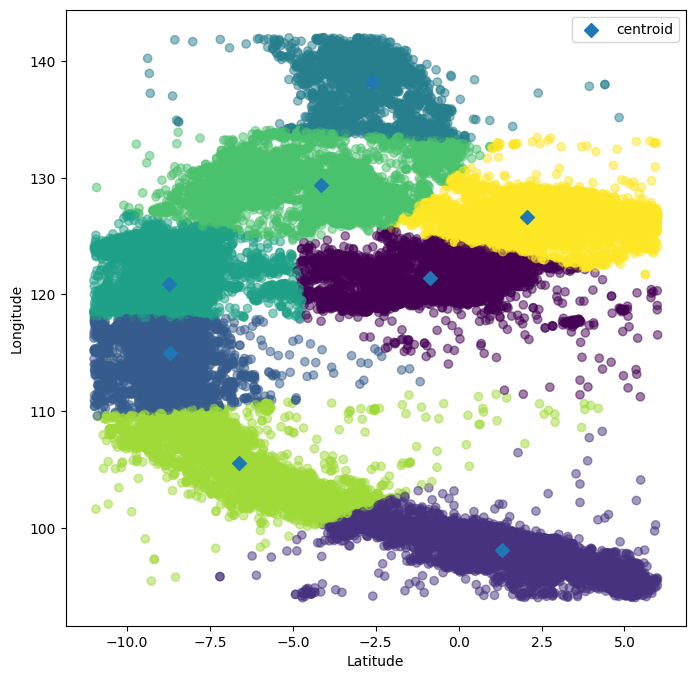

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(X, Y, alpha=0.5, c=labels)
plt.scatter(centroids_X, centroids_Y, marker='D', s=50, label='centroid')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show

#### Menentukan Jumlah Cluster (Elbow Method)

In [19]:
kluster_range = range(1, 9)
inertias = []

for k in kluster_range:
    model =KMeans(n_clusters=k)
    model.fit(points)
    inertias.append(model.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

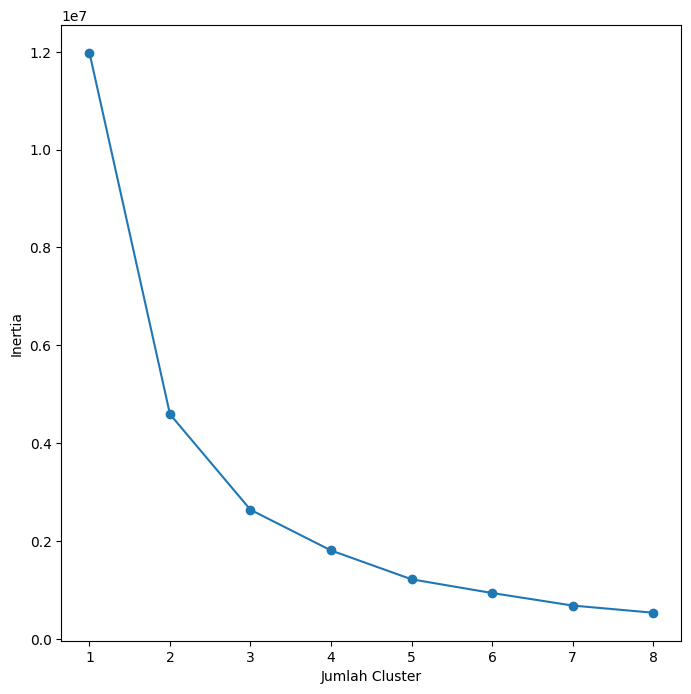

In [20]:
plt.figure(figsize=(8,8))
plt.plot(kluster_range, inertias, '-o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.xticks(kluster_range)
plt.show